In [1]:
import pandas as pd
data=pd.read_csv(filepath_or_buffer=r'C:\Users\pc\Downloads\CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

# Data preprocessing

In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
data.drop(["CUST_ID"],axis=1,inplace=True)
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(),inplace=True)
print(data["MINIMUM_PAYMENTS"].value_counts())

299.351881     2
3.197940       1
111.691332     1
129.682608     1
872.760983     1
              ..
1227.773229    1
127.210691     1
6422.472544    1
471.940554     1
189.459157     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64


In [5]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Data viz

In [6]:
import matplotlib.pyplot as plt

plt.scatter(data["PURCHASES_FREQUENCY"],data["BALANCE"])
plt.show()

<Figure size 640x480 with 1 Axes>

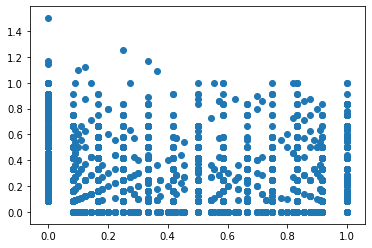

In [7]:
plt.scatter(data["PURCHASES_FREQUENCY"],data["CASH_ADVANCE_FREQUENCY"])
plt.show()

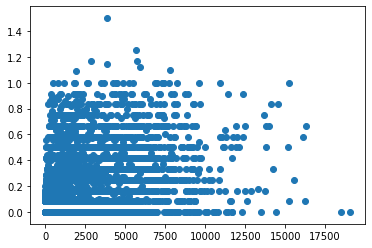

In [8]:
plt.scatter(data["BALANCE"],data["CASH_ADVANCE_FREQUENCY"])
plt.show()

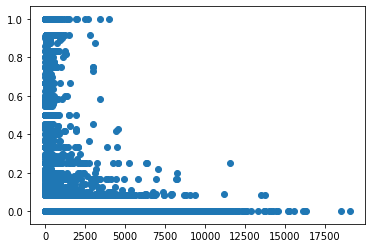

In [9]:
plt.scatter(data["BALANCE"],data["PRC_FULL_PAYMENT"])
plt.show()

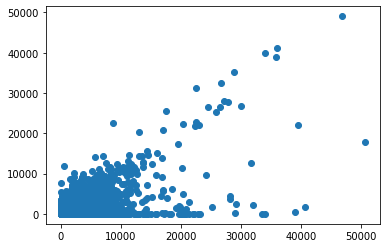

In [11]:
plt.scatter(data["PAYMENTS"],data["PURCHASES"])
plt.show()

# Hierarchical clustering

In [12]:
from sklearn.cluster import AgglomerativeClustering

model= AgglomerativeClustering(n_clusters = 4, affinity ='euclidean')
labels=model.fit_predict(data)

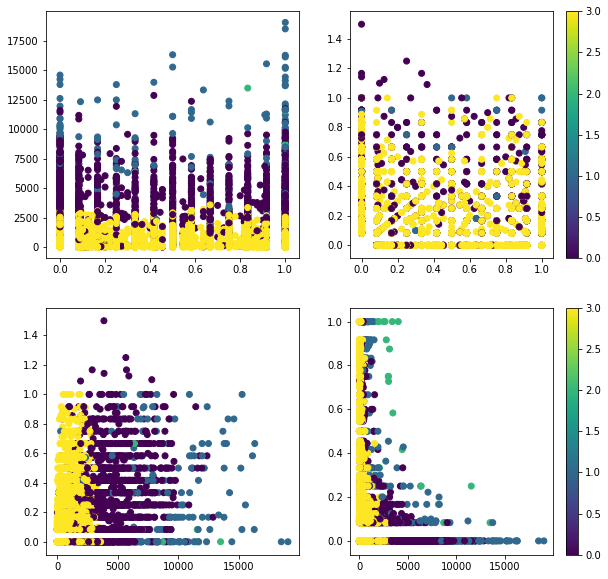

In [13]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
scatter1=ax1.scatter(data["PURCHASES_FREQUENCY"],data["BALANCE"],c=labels)
ax2=fig.add_subplot(2,2,2)
scatter2=ax2.scatter(data["PURCHASES_FREQUENCY"],data["CASH_ADVANCE_FREQUENCY"],c=labels)
plt.colorbar(scatter1)
ax3=fig.add_subplot(2,2,3)
scatter3=ax3.scatter(data["BALANCE"],data["CASH_ADVANCE_FREQUENCY"],c=labels)
ax4=fig.add_subplot(2,2,4)
scatter4=ax4.scatter(data["BALANCE"],data["PRC_FULL_PAYMENT"],c=labels)
plt.colorbar(scatter1)

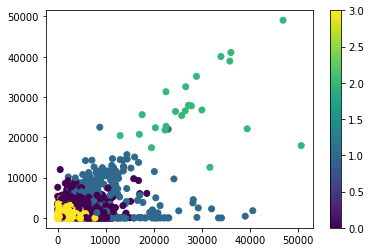

In [16]:
plt.scatter(data["PAYMENTS"],data["PURCHASES"],c=labels)
plt.colorbar()
plt.show()

We can extract from the last plot that we have 4 types of customers:
 - The ones who buy a lot and pay a lot
 - The ones who buy a lot and pay moderately
 - The ones who buy and pay moderately
 - The ones who buy a little and pay a little

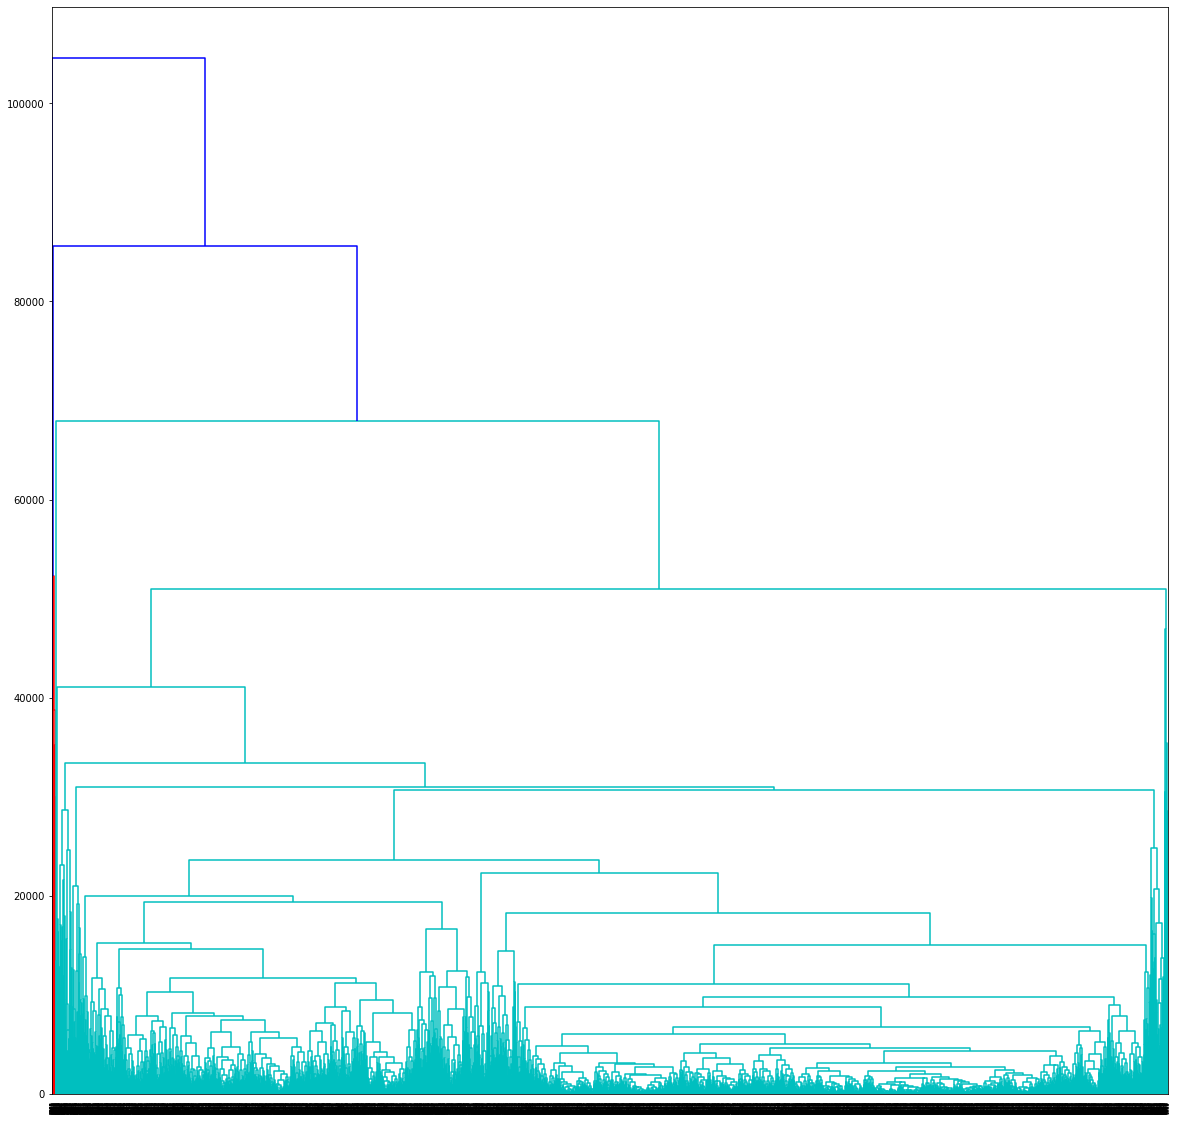

In [17]:
from scipy.cluster.hierarchy import linkage,dendrogram

plt.figure(figsize=(20,20))
Z=linkage(data,method='complete')
dendrogram(Z)
plt.show()
#dend=shc.dendrogram(shc.linkage(data,method='complete'))

# K-means elbow method

In [86]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

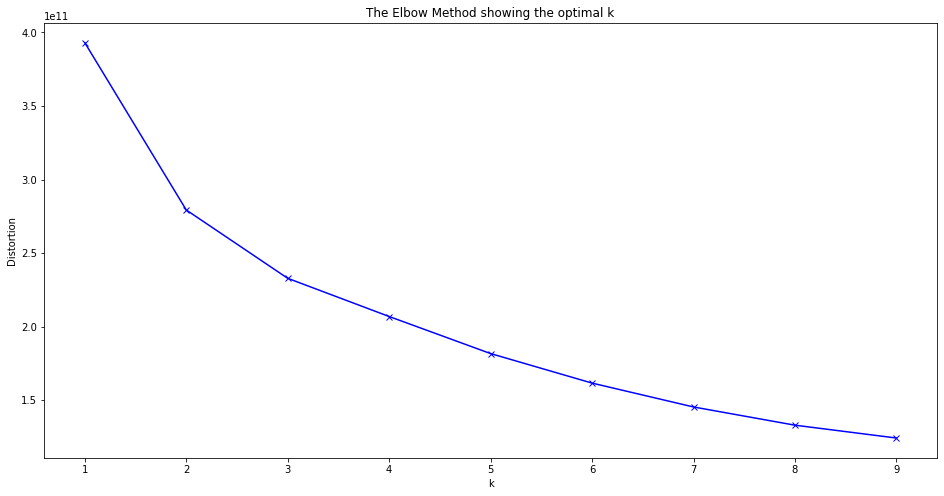

In [87]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [88]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data)
labels=kmeanModel.labels_


[0 1 1 ... 0 0 0]


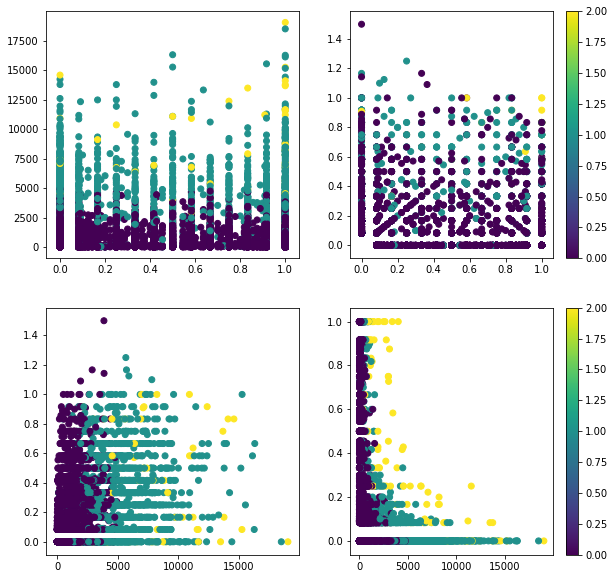

In [89]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
scatter1=ax1.scatter(data["PURCHASES_FREQUENCY"],data["BALANCE"],c=labels)
ax2=fig.add_subplot(2,2,2)
scatter2=ax2.scatter(data["PURCHASES_FREQUENCY"],data["CASH_ADVANCE_FREQUENCY"],c=labels)
plt.colorbar(scatter1)
ax3=fig.add_subplot(2,2,3)
scatter3=ax3.scatter(data["BALANCE"],data["CASH_ADVANCE_FREQUENCY"],c=labels)
ax4=fig.add_subplot(2,2,4)
scatter4=ax4.scatter(data["BALANCE"],data["PRC_FULL_PAYMENT"],c=labels)
plt.colorbar(scatter1)

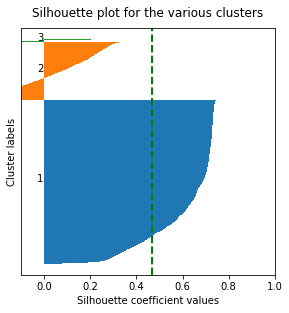

In [93]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

silhouette_vals = silhouette_samples(data, labels)
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);